In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import wavelet_transform as wt
import signal_processing as sp
from create_graph import create_graph

In [2]:
shapefile = gpd.read_file("data/LAYER_DISTRITO/sp.shp")
adj_matrix = create_graph(shapefile)
signal_1 = np.load("data/time_series/furto_celular_district.npy")
signal_2 = np.load("data/time_series/roubo_celular_district.npy")
n_timestamps = signal_1.shape[1]

ERROR 1: PROJ: proj_create_from_database: Open of /home/giovani/anaconda3/envs/wavelet_code/share/proj failed


In [3]:
wav =  wt.WaveletTransform(
    adj_matrix,
    n_timestamps,
    graph_product="strong",
    n_filters=32,
    kernel="abspline",
    scaling_function=False,
    method="chebyshev",
    order_chebyshev=30,
)

In [4]:
coeffs_1 = wav.transform(signal_1)
coeffs_2 = wav.transform(signal_2)

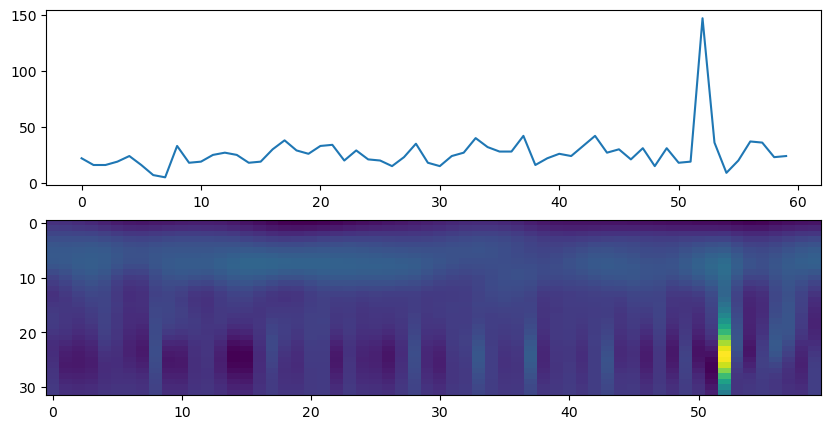

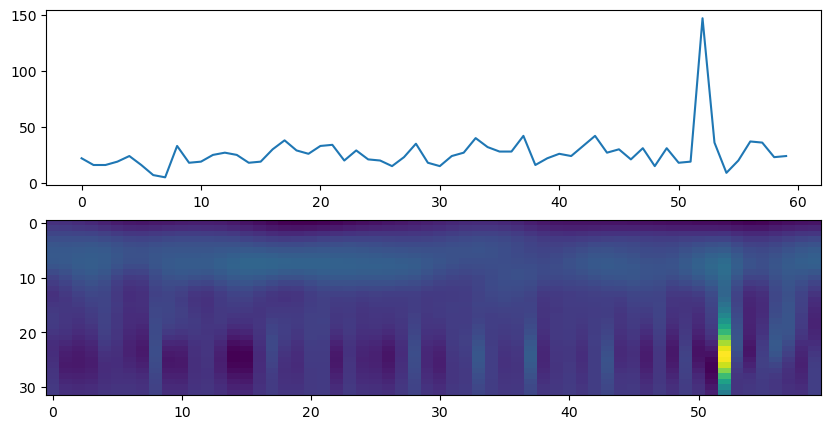

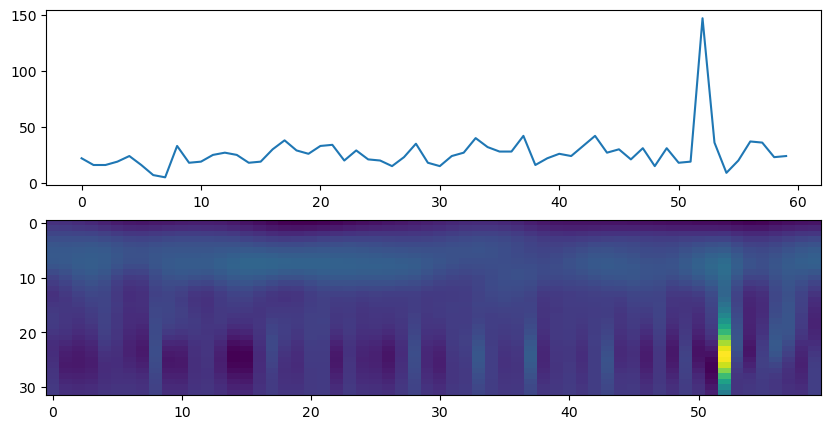

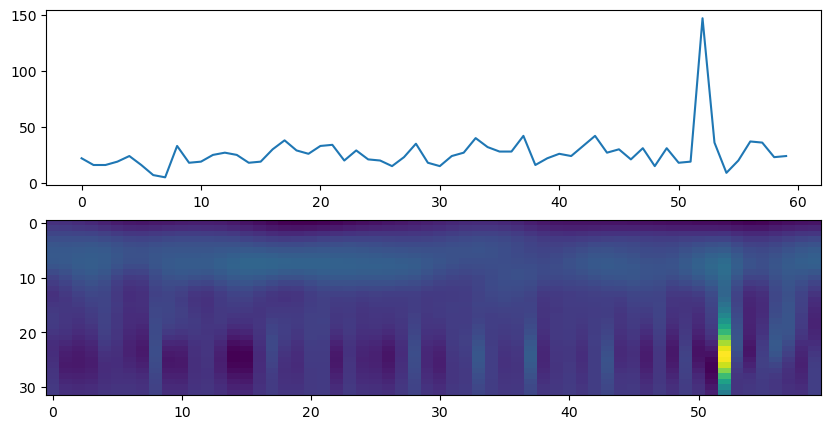

In [9]:
i = 0
fig = plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(signal_1[i])

plt.subplot(2, 1, 2)
plt.imshow(coeffs_1[i].T, aspect="auto", cmap="viridis")

plt.show()

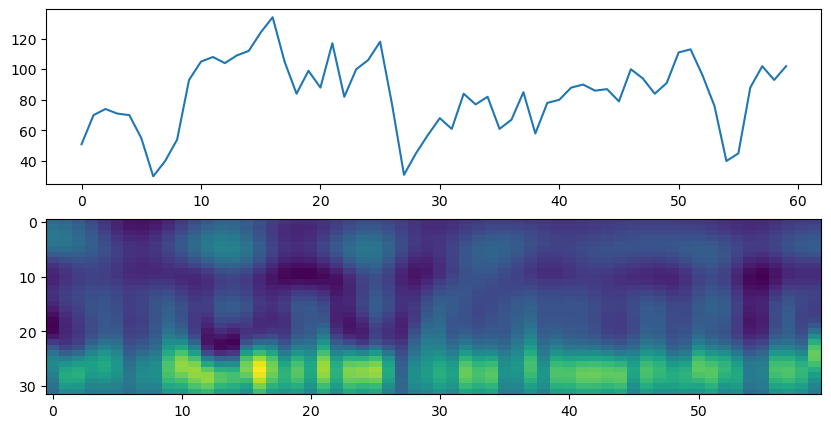

In [11]:
i = 10
fig = plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(signal_1[i])

plt.subplot(2, 1, 2)
plt.imshow(coeffs_1[i].T, aspect="auto", cmap="viridis")

plt.show()

In [20]:
def divide_frequencies(coeffs):
    scaled_coeffs = sp.get_scaled_coefficients(coeffs)
    n_f = scaled_coeffs.shape[-1]
    assert n_f % 4 == 0
    n_f = n_f // 4

    dom_freq = np.zeros((scaled_coeffs.shape[0], scaled_coeffs.shape[1], 4))
    for i in range(4):
        dom_freq[:, :, i] = np.mean(scaled_coeffs[:, :, i * n_f : (i + 1) * n_f], axis=-1)

    return dom_freq

dom_freq_1 = divide_frequencies(coeffs_1)
dom_freq_2 = divide_frequencies(coeffs_2)

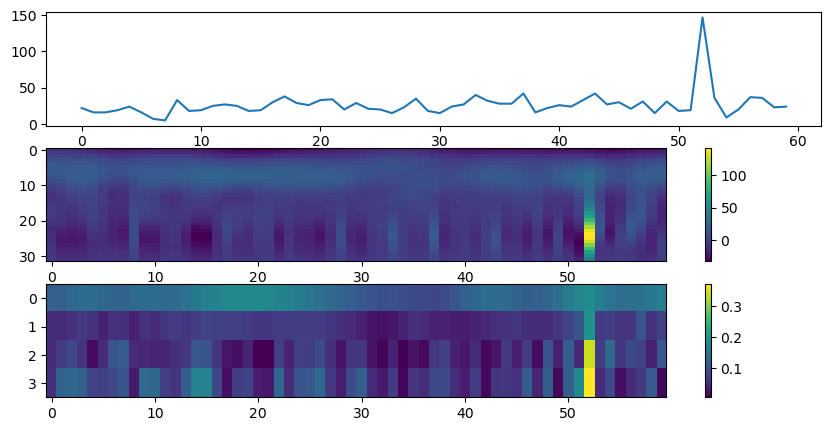

In [23]:
i = 0
fig = plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(signal_1[i])

plt.subplot(3, 1, 2)
plt.imshow(coeffs_1[i].T, aspect="auto", cmap="viridis")
plt.colorbar()

plt.subplot(3, 1, 3)
plt.imshow(dom_freq_1[i].T, aspect="auto", cmap="viridis")
plt.colorbar()

plt.show()

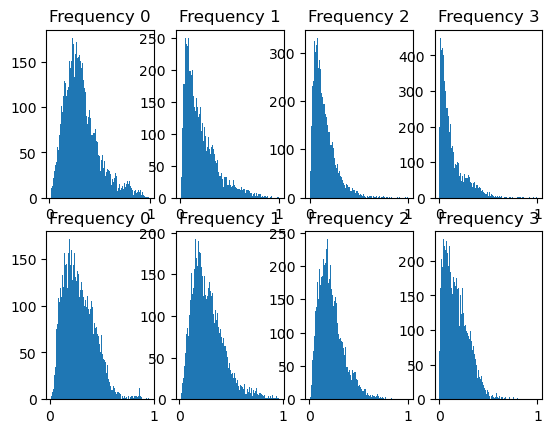

In [25]:
fig, axs = plt.subplots(nrows = 2, ncols = 4)

for i in range(4):
    axs[0, i].hist(dom_freq_1[:, :, i].flatten(), bins=100)
    axs[0, i].set_title(f"Frequency {i}")

    axs[1, i].hist(dom_freq_2[:, :, i].flatten(), bins=100)
    axs[1, i].set_title(f"Frequency {i}")

plt.show()

In [34]:
def get_high_freq(dom_freq, threshold = 0.8):
    high_freq = dom_freq > threshold
    high_freq = high_freq.sum(axis = 0)
    return high_freq

high_freq_1 = get_high_freq(dom_freq_1)
high_freq_2 = get_high_freq(dom_freq_2)

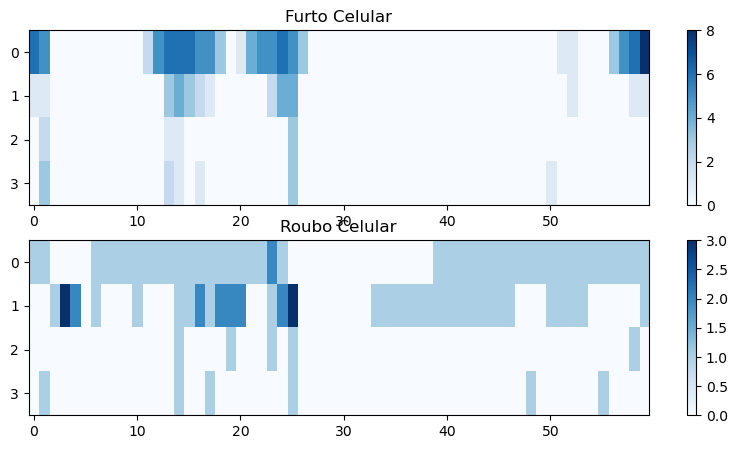

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.imshow(high_freq_1.T, aspect="auto", cmap="Blues")
plt.colorbar()
plt.title("Furto Celular")

plt.subplot(2, 1, 2)
plt.imshow(high_freq_2.T, aspect="auto", cmap="Blues")
plt.colorbar()
plt.title("Roubo Celular")

plt.show()


In [15]:
def test_other_approach(coeffs, threshold = 0.8):
    scaled_coeffs = sp.get_scaled_coefficients(coeffs)
    scaled_coeffs = scaled_coeffs[:, :, ::8]
    scaled_coeffs = scaled_coeffs > threshold
    scaled_coeffs = scaled_coeffs.sum(axis = 0)
    return scaled_coeffs

In [17]:
high_freq_1 = test_other_approach(coeffs_1)
high_freq_2 = test_other_approach(coeffs_2)

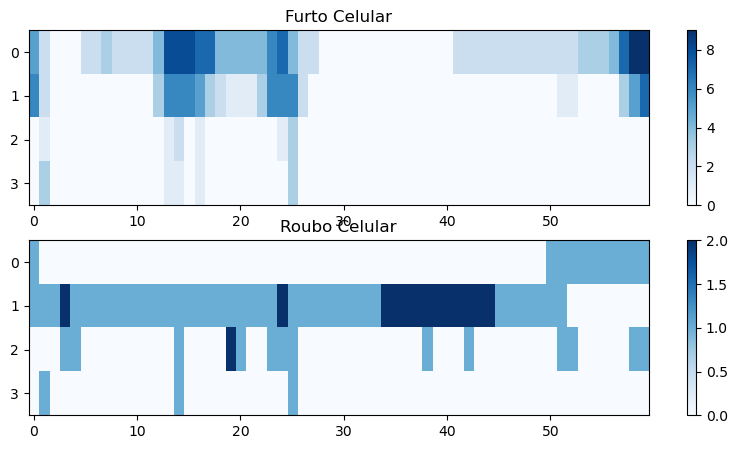

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.imshow(high_freq_1.T, aspect="auto", cmap="Blues")
plt.colorbar()
plt.title("Furto Celular")

plt.subplot(2, 1, 2)
plt.imshow(high_freq_2.T, aspect="auto", cmap="Blues")
plt.colorbar()
plt.title("Roubo Celular")

plt.show()
